In [1]:
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil.relativedelta import relativedelta
import quantstats as qs
import warnings
import yfinance as yf
import numpy as np
from bcb import sgs
yf.pdr_override()
warnings.filterwarnings('ignore')

# Como funciona a lógica do programa?

* Pegar composição do Ibovespa desde 2015. (Definir universo investível)
* Criar a lista de códigos de negociação de todas as empresas que passaram no Ibovespa desde 2015.
* Puxar as cotações dessa lista de códigos de negociação. 
* Tratar os dados de cotação: Lidar com dados faltantes, mudar para a frequência mensal e correção/extração das datas. 
* Calcular retornos mensais e 6 meses (retorno da carteira e indicador momento 6 meses).
* Tratar dados de retorno e preço para um formato mais amigável. 
* Calcular retornos do modelo.
* Puxar dados do Ibovespa.
* Tretar os dados e calcular retorno mensal do Ibovespa.
* Visualizar retornos e estatística mensal do modelo e do Ibovespa.
* Calcular retorno ano a ano.
* Calcular retorno acumulado.
* Visualizar retorno acumulado.

In [2]:
tickers = pd.read_excel("composicao_ibov.xlsx")

tickers

,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2023-01-31
0,ABEV3,ABEV3,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,...,VALE3,VALE3,VALE3,VALE3,VALE3,RRRP3,RRRP3,RRRP3,RRRP3,RRRP3
1,AMER3,BBAS3,ABEV3,BBDC4,BBDC4,ABEV3,ABEV3,ABEV3,BBDC4,ABEV3,...,PETR4,PETR4,PETR4,PETR4,PETR4,ALPA4,ALPA4,ALPA4,ALPA4,ALPA4
2,AURE3,BBDC3,BBDC4,ABEV3,ABEV3,BBDC4,BBDC4,BBDC4,ABEV3,BBDC4,...,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3
3,B3SA3,BBDC4,BRFS3,PETR4,PETR4,BRFS3,PETR4,PETR4,PETR4,PETR4,...,BBDC4,BBDC4,BBDC4,BBDC4,PETR3,AMER3,AMER3,AMER3,AMER3,AMER3
4,B3SA3,BBSE3,CIEL3,BRFS3,PETR3,PETR4,BRFS3,BRFS3,BRFS3,BRFS3,...,B3SA3,PETR3,PETR3,PETR3,BBDC4,ARZZ3,ARZZ3,ARZZ3,ARZZ3,ARZZ3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,JHSF3,JHSF3,GOLL4,GOLL4,GOLL4,VALE3,VALE3,VALE3,VALE3,WEGE3
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,EZTC3,EZTC3,JHSF3,EZTC3,CASH3,VIIA3,VIIA3,VIIA3,VIIA3,YDUQ3
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CASH3,CASH3,EZTC3,CASH3,POSI3,VBBR3,VBBR3,VBBR3,VBBR3,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,POSI3,POSI3,CASH3,POSI3,NaN,WEGE3,WEGE3,WEGE3,WEGE3,NaN


In [3]:
#pegando lista de tickers

intervalo_tempo = tickers.columns

lista_tickers = []

for mes in intervalo_tempo:

    tickers_no_ano = tickers[mes]

    tickers_no_ano = tickers_no_ano.dropna()

    tickers_no_ano = tickers_no_ano + ".SA"

    lista_tickers.append(tickers_no_ano)


lista_tickers_finais = pd.concat(lista_tickers)

lista_tickers_finais = lista_tickers_finais.drop_duplicates()

lista_tickers_finais = list(lista_tickers_finais)

lista_tickers_finais

intervalo_tempo

DatetimeIndex(['2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31',
               '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31',
               '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30',
               '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31',
               '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31',
               '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30',
               '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31',
               '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
               '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
               '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31',
               '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
               '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
               '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
               '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
      

In [5]:
#puxando dados de cotação ajustada

dados_cotacoes = pdr.get_data_yahoo(lista_tickers_finais, start="2015-06-30", end= '2023-01-31')['Adj Close']
dados_cotacoes

[*********************100%***********************]  107 of 107 completed

5 Failed downloads:
- HGTX3.SA: No data found for this date range, symbol may be delisted
- BIDI4.SA: No data found for this date range, symbol may be delisted
- JPSA3.SA: No data found for this date range, symbol may be delisted
- BIDI11.SA: No data found for this date range, symbol may be delisted
- LCAM3.SA: No data found for this date range, symbol may be delisted


,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,14.668834,5.577975,19.304613,19.890108,NaN,NaN,NaN,2.914592,16.064672,9.204789,...,29.088478,3.501015,11.896463,14.912728,NaN,6.839885,21.685190,11.133475,6.445273,13.737411
2015-07-01,14.776980,5.665765,18.623274,19.898392,NaN,NaN,NaN,2.894613,15.859561,9.145575,...,28.809891,3.475523,11.779387,14.759581,NaN,6.839885,21.480059,11.222940,6.604625,13.546081
2015-07-02,14.707457,5.631999,18.831461,20.088923,NaN,NaN,NaN,2.884623,15.813249,9.151255,...,29.154812,3.492518,11.753368,14.797869,NaN,6.839885,22.007540,11.073833,6.635141,13.622611
2015-07-03,14.792429,5.638753,18.594885,19.964664,NaN,NaN,NaN,2.857149,15.661075,9.177586,...,28.951395,3.424537,11.499700,NaN,NaN,7.655103,22.007540,NaN,6.723293,13.530774
2015-07-06,14.846498,5.604988,19.683134,19.964664,NaN,NaN,NaN,2.882125,15.780174,8.999833,...,29.185764,3.552001,11.480184,14.328854,NaN,7.655103,21.984102,10.934664,6.716511,13.431284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-24,13.610000,13.040000,0.800000,82.870003,21.049999,14.92,11.74,12.840000,39.570000,12.572570,...,12.970000,8.270000,95.300003,NaN,15.46,2.510000,40.599998,NaN,37.209999,9.550000
2023-01-25,13.710000,13.500000,0.940000,84.370003,21.110001,15.18,11.99,13.110000,40.650002,12.592542,...,13.160000,8.280000,96.199997,NaN,15.99,2.460000,40.029999,NaN,38.720001,9.620000
2023-01-26,13.740000,13.240000,1.030000,83.639999,21.000000,15.28,12.04,13.120000,40.630001,12.562584,...,13.150000,8.590000,98.000000,NaN,15.95,2.440000,40.220001,NaN,38.209999,9.600000


In [6]:
#resample pra mensal
dados_cotacoes.index = pd.to_datetime(dados_cotacoes.index)

ultima_linha = dados_cotacoes.iloc[-1:]
dados_cotacoes_mensais = dados_cotacoes.resample("M").last()

dados_cotacoes_mensais

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,14.668834,5.577975,19.304613,19.890108,NaN,NaN,NaN,2.914592,16.064672,9.204789,...,29.088478,3.501015,11.896463,14.912728,NaN,6.839885,21.685190,11.133475,6.445273,13.737411
2015-07-31,15.039611,5.267337,17.118650,17.744526,NaN,NaN,NaN,2.612393,14.589213,9.105165,...,31.078417,3.339561,11.623281,14.022558,NaN,7.655103,22.663956,8.598621,6.371393,10.890436
2015-08-31,14.746079,5.139030,14.762350,18.220684,NaN,NaN,NaN,2.729601,11.887412,8.290727,...,28.220440,2.532288,11.655805,13.543973,NaN,7.655103,20.284353,6.769551,5.703946,9.543481
2015-09-30,15.116619,4.578724,14.062085,16.571831,NaN,NaN,NaN,2.805564,10.301099,7.785677,...,29.701044,2.846699,10.784218,12.749520,NaN,2.704140,18.237305,3.936479,5.278554,10.790945
2015-10-31,14.859745,5.767762,13.797121,17.487858,NaN,NaN,NaN,2.886591,10.822931,7.731900,...,29.789967,2.362335,11.319360,13.762343,NaN,2.883091,19.972157,4.224756,4.919817,11.831773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,14.762184,21.270000,16.980000,97.418350,17.516525,13.55,14.720000,12.961282,37.941753,15.571620,...,11.730000,7.520000,71.795647,NaN,16.815786,3.190000,39.401550,NaN,32.093353,14.450000
2022-10-31,15.199160,21.959999,15.540000,103.446976,19.782196,14.92,16.129999,14.937754,36.464268,15.902455,...,13.410000,7.230000,66.902298,NaN,17.790615,3.130000,40.199505,NaN,40.221539,16.129999
2022-11-30,15.123164,16.750000,10.560000,88.667427,20.011757,13.83,12.280000,12.643456,34.919239,13.163695,...,14.200000,7.820000,85.419281,NaN,16.113911,2.180000,37.027138,NaN,38.943398,11.500000


In [7]:
# #adicionando uma linha
# dados_cotacoes_mensais = dados_cotacoes_mensais.append(ultima_linha)

# #excluindo uma linha
# dados_cotacoes_mensais = dados_cotacoes_mensais.drop("2023-01-31", axis = 0)

dados_cotacoes_mensais

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,14.668834,5.577975,19.304613,19.890108,NaN,NaN,NaN,2.914592,16.064672,9.204789,...,29.088478,3.501015,11.896463,14.912728,NaN,6.839885,21.685190,11.133475,6.445273,13.737411
2015-07-31,15.039611,5.267337,17.118650,17.744526,NaN,NaN,NaN,2.612393,14.589213,9.105165,...,31.078417,3.339561,11.623281,14.022558,NaN,7.655103,22.663956,8.598621,6.371393,10.890436
2015-08-31,14.746079,5.139030,14.762350,18.220684,NaN,NaN,NaN,2.729601,11.887412,8.290727,...,28.220440,2.532288,11.655805,13.543973,NaN,7.655103,20.284353,6.769551,5.703946,9.543481
2015-09-30,15.116619,4.578724,14.062085,16.571831,NaN,NaN,NaN,2.805564,10.301099,7.785677,...,29.701044,2.846699,10.784218,12.749520,NaN,2.704140,18.237305,3.936479,5.278554,10.790945
2015-10-31,14.859745,5.767762,13.797121,17.487858,NaN,NaN,NaN,2.886591,10.822931,7.731900,...,29.789967,2.362335,11.319360,13.762343,NaN,2.883091,19.972157,4.224756,4.919817,11.831773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,14.762184,21.270000,16.980000,97.418350,17.516525,13.55,14.720000,12.961282,37.941753,15.571620,...,11.730000,7.520000,71.795647,NaN,16.815786,3.190000,39.401550,NaN,32.093353,14.450000
2022-10-31,15.199160,21.959999,15.540000,103.446976,19.782196,14.92,16.129999,14.937754,36.464268,15.902455,...,13.410000,7.230000,66.902298,NaN,17.790615,3.130000,40.199505,NaN,40.221539,16.129999
2022-11-30,15.123164,16.750000,10.560000,88.667427,20.011757,13.83,12.280000,12.643456,34.919239,13.163695,...,14.200000,7.820000,85.419281,NaN,16.113911,2.180000,37.027138,NaN,38.943398,11.500000


In [8]:
#extraindo datas das carteiras

datas_carteiras = list(dados_cotacoes_mensais.index)[6:]
datas_carteiras


[Timestamp('2015-12-31 00:00:00', freq='M'),
 Timestamp('2016-01-31 00:00:00', freq='M'),
 Timestamp('2016-02-29 00:00:00', freq='M'),
 Timestamp('2016-03-31 00:00:00', freq='M'),
 Timestamp('2016-04-30 00:00:00', freq='M'),
 Timestamp('2016-05-31 00:00:00', freq='M'),
 Timestamp('2016-06-30 00:00:00', freq='M'),
 Timestamp('2016-07-31 00:00:00', freq='M'),
 Timestamp('2016-08-31 00:00:00', freq='M'),
 Timestamp('2016-09-30 00:00:00', freq='M'),
 Timestamp('2016-10-31 00:00:00', freq='M'),
 Timestamp('2016-11-30 00:00:00', freq='M'),
 Timestamp('2016-12-31 00:00:00', freq='M'),
 Timestamp('2017-01-31 00:00:00', freq='M'),
 Timestamp('2017-02-28 00:00:00', freq='M'),
 Timestamp('2017-03-31 00:00:00', freq='M'),
 Timestamp('2017-04-30 00:00:00', freq='M'),
 Timestamp('2017-05-31 00:00:00', freq='M'),
 Timestamp('2017-06-30 00:00:00', freq='M'),
 Timestamp('2017-07-31 00:00:00', freq='M'),
 Timestamp('2017-08-31 00:00:00', freq='M'),
 Timestamp('2017-09-30 00:00:00', freq='M'),
 Timestamp

In [9]:
#preenchendo NAs com zero para calcular retorno

dados_cotacoes_mensais = dados_cotacoes_mensais.fillna(0)

dados_cotacoes_mensais

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,14.668834,5.577975,19.304613,19.890108,0.000000,0.00,0.000000,2.914592,16.064672,9.204789,...,29.088478,3.501015,11.896463,14.912728,0.000000,6.839885,21.685190,11.133475,6.445273,13.737411
2015-07-31,15.039611,5.267337,17.118650,17.744526,0.000000,0.00,0.000000,2.612393,14.589213,9.105165,...,31.078417,3.339561,11.623281,14.022558,0.000000,7.655103,22.663956,8.598621,6.371393,10.890436
2015-08-31,14.746079,5.139030,14.762350,18.220684,0.000000,0.00,0.000000,2.729601,11.887412,8.290727,...,28.220440,2.532288,11.655805,13.543973,0.000000,7.655103,20.284353,6.769551,5.703946,9.543481
2015-09-30,15.116619,4.578724,14.062085,16.571831,0.000000,0.00,0.000000,2.805564,10.301099,7.785677,...,29.701044,2.846699,10.784218,12.749520,0.000000,2.704140,18.237305,3.936479,5.278554,10.790945
2015-10-31,14.859745,5.767762,13.797121,17.487858,0.000000,0.00,0.000000,2.886591,10.822931,7.731900,...,29.789967,2.362335,11.319360,13.762343,0.000000,2.883091,19.972157,4.224756,4.919817,11.831773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,14.762184,21.270000,16.980000,97.418350,17.516525,13.55,14.720000,12.961282,37.941753,15.571620,...,11.730000,7.520000,71.795647,0.000000,16.815786,3.190000,39.401550,0.000000,32.093353,14.450000
2022-10-31,15.199160,21.959999,15.540000,103.446976,19.782196,14.92,16.129999,14.937754,36.464268,15.902455,...,13.410000,7.230000,66.902298,0.000000,17.790615,3.130000,40.199505,0.000000,40.221539,16.129999
2022-11-30,15.123164,16.750000,10.560000,88.667427,20.011757,13.83,12.280000,12.643456,34.919239,13.163695,...,14.200000,7.820000,85.419281,0.000000,16.113911,2.180000,37.027138,0.000000,38.943398,11.500000


In [10]:
#calculando retorno mensal

for i, nome_empresa in enumerate(dados_cotacoes_mensais.columns):

    if i == 0:

      retornos = dados_cotacoes_mensais[nome_empresa].pct_change()

      retornos = retornos.replace([np.inf, -np.inf, -1], 0)

      df_retornos = pd.DataFrame(data = {nome_empresa: retornos}, index = dados_cotacoes_mensais.index)

    else:
    
      df_retornos[nome_empresa] = dados_cotacoes_mensais[nome_empresa].pct_change().replace([np.inf, -np.inf, -1], 0)


df_retornos

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,0.025277,-0.055690,-0.113235,-0.107872,NaN,NaN,NaN,-0.103685,-0.091845,-0.010823,...,0.068410,-0.046116,-0.022963,-0.059692,NaN,0.119186,0.045135,-0.227679,-0.011463,-0.207242
2015-08-31,-0.019517,-0.024359,-0.137645,0.026834,NaN,NaN,NaN,0.044866,-0.185192,-0.089448,...,-0.091960,-0.241730,0.002798,-0.034130,NaN,0.000000,-0.104995,-0.212717,-0.104757,-0.123682
2015-09-30,0.025128,-0.109030,-0.047436,-0.090493,NaN,NaN,NaN,0.027829,-0.133445,-0.060917,...,0.052466,0.124161,-0.074777,-0.058657,NaN,-0.646753,-0.100918,-0.418502,-0.074578,0.130714
2015-10-31,-0.016993,0.259688,-0.018842,0.055276,NaN,NaN,NaN,0.028881,0.050658,-0.006907,...,0.002994,-0.170149,0.049623,0.079440,NaN,0.066177,0.095127,0.073232,-0.067961,0.096454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,0.017682,0.030523,0.039168,0.065043,-0.045677,-0.118412,-0.107338,0.108099,-0.069854,0.030794,...,-0.133038,-0.062344,0.116899,NaN,-0.042928,-0.009317,-0.011481,NaN,0.137732,0.173842
2022-10-31,0.029601,0.032440,-0.084806,0.061884,0.129345,0.101107,0.095788,0.152490,-0.038941,0.021246,...,0.143223,-0.038564,-0.068157,NaN,0.057971,-0.018809,0.020252,NaN,0.253267,0.116263
2022-11-30,-0.005000,-0.237250,-0.320463,-0.142871,0.011604,-0.073056,-0.238686,-0.153591,-0.042371,-0.172222,...,0.058911,0.081604,0.276776,NaN,-0.094247,-0.303514,-0.078916,NaN,-0.031778,-0.287043


In [11]:
#calculando retorno 6 meses

for i, nome_empresa in enumerate(dados_cotacoes_mensais.columns):

    if i == 0:

      retornos = dados_cotacoes_mensais[nome_empresa].pct_change(periods = 6)

      retornos = retornos.replace([np.inf, -np.inf, -1], 0)

      df_retornos_6m = pd.DataFrame(data = {nome_empresa: retornos}, index = dados_cotacoes_mensais.index)

    else:
    
      df_retornos_6m[nome_empresa] = dados_cotacoes_mensais[nome_empresa].pct_change(periods = 6).replace([np.inf, -np.inf, -1], 0)


df_retornos_6m.head(10)

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,-0.044826,-0.076286,-0.253431,-0.113005,NaN,NaN,NaN,-0.019676,-0.362492,-0.235068,...,-0.076003,-0.623786,-0.273276,-0.325780,NaN,-0.781977,-0.067328,-0.708036,-0.204485,-0.222841
2016-01-31,-0.026099,0.001545,-0.266998,-0.100444,NaN,NaN,NaN,0.030454,-0.340404,-0.260393,...,-0.150474,-0.783715,-0.445144,-0.493539,NaN,-0.838961,-0.182059,-0.662428,-0.167808,-0.177091
2016-02-29,-0.054421,0.251857,-0.259615,-0.178821,NaN,NaN,NaN,0.116931,-0.208608,-0.034315,...,-0.003877,-0.697987,-0.327719,-0.380042,NaN,-0.707792,0.000863,-0.364170,-0.202454,0.023256


In [12]:
df_retornos = df_retornos.loc["2015-12-31": ]
df_retornos_6m = df_retornos_6m.loc["2015-12-31": ]

df_retornos_6m

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.044826,-0.076286,-0.253431,-0.113005,NaN,NaN,NaN,-0.019676,-0.362492,-0.235068,...,-0.076003,-0.623786,-0.273276,-0.325780,NaN,-0.781977,-0.067328,-0.708036,-0.204485,-0.222841
2016-01-31,-0.026099,0.001545,-0.266998,-0.100444,NaN,NaN,NaN,0.030454,-0.340404,-0.260393,...,-0.150474,-0.783715,-0.445144,-0.493539,NaN,-0.838961,-0.182059,-0.662428,-0.167808,-0.177091
2016-02-29,-0.054421,0.251857,-0.259615,-0.178821,NaN,NaN,NaN,0.116931,-0.208608,-0.034315,...,-0.003877,-0.697987,-0.327719,-0.380042,NaN,-0.707792,0.000863,-0.364170,-0.202454,0.023256
2016-03-31,-0.016942,0.232224,-0.044415,0.183738,NaN,NaN,NaN,0.435515,0.347494,0.330232,...,0.052332,-0.459701,-0.067891,-0.124446,NaN,-0.110294,0.258974,0.406566,-0.078546,-0.159575
2016-04-30,0.031436,0.167526,-0.060357,0.164968,NaN,NaN,NaN,0.561556,0.434325,0.376728,...,0.087326,-0.100719,0.154162,0.121882,NaN,0.024346,0.138833,0.442703,0.068157,-0.207022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,0.009091,-0.184120,-0.479939,0.106898,0.086093,-0.147533,-0.384615,-0.154352,0.136021,0.000962,...,-0.145272,-0.432637,-0.207386,NaN,-0.244360,-0.235012,-0.216785,NaN,-0.070701,-0.304705
2022-10-31,0.101928,0.120408,-0.352500,0.184724,0.297120,0.023815,-0.265817,0.151202,0.140424,0.136441,...,0.057887,-0.360743,-0.152247,NaN,-0.119768,0.053872,-0.213826,NaN,0.349226,0.000620
2022-11-30,0.121917,-0.229885,-0.474627,0.127067,0.265783,-0.009312,-0.389359,0.014829,-0.013285,-0.170037,...,-0.011830,-0.286496,0.045730,NaN,-0.133827,-0.305732,-0.246783,NaN,0.549908,-0.289246


In [13]:
dados_cotacoes_mensais = dados_cotacoes_mensais.reset_index()

df_retornos = df_retornos.reset_index()
df_retornos_6m = df_retornos_6m.reset_index()


dados_cotacoes_mensais = pd.melt(dados_cotacoes_mensais, id_vars= "Date", var_name= "cod", value_name= "cotacao")
df_retornos = pd.melt(df_retornos, id_vars= "Date", var_name= "cod", value_name= "retorno_1m")
df_retornos_6m = pd.melt(df_retornos_6m, id_vars= "Date", var_name= "cod", value_name= "retorno_6m")

In [14]:
dados_cotacoes_mensais = dados_cotacoes_mensais.dropna()
df_retornos = df_retornos.dropna()
df_retornos_6m = df_retornos_6m.dropna()

dados_cotacoes_mensais

,Date,cod,cotacao
0,2015-06-30,ABEV3.SA,14.668834
1,2015-07-31,ABEV3.SA,15.039611
2,2015-08-31,ABEV3.SA,14.746079
3,2015-09-30,ABEV3.SA,15.116619
4,2015-10-31,ABEV3.SA,14.859745
...,...,...,...
9839,2022-09-30,YDUQ3.SA,14.450000
9840,2022-10-31,YDUQ3.SA,16.129999
9841,2022-11-30,YDUQ3.SA,11.500000
9842,2022-12-31,YDUQ3.SA,10.170000


In [17]:
lista_retornos = []

#Logica: Pega os codigos de negociação -> Acha os retornos 6M -> Filtra os 10 maiores -> Calcula o retorno de 1 mês dessa carteira -> Repete

for indice, mes in enumerate(datas_carteiras):

    #pegando empresas do ibov mes a mes

    empresas_ibov = tickers[intervalo_tempo[indice-1]]

    empresas_ibov = list(empresas_ibov.dropna().values) 

    empresas_ibov = [empresa + ".SA" for empresa in empresas_ibov] #quero x a cada y

    #pegando retornos 6 meses pra criar o ranking

    retornos_empresas_ibov_esse_ano = df_retornos_6m[(df_retornos_6m["cod"].isin(empresas_ibov)) & (df_retornos_6m['Date'] == mes)]

    #pegando os 10 maiores retornos

    dez_maiores_retornos = retornos_empresas_ibov_esse_ano.sort_values(by = "retorno_6m", ascending = False).head(10)

    tickers_dez_maiores_retornos = dez_maiores_retornos["cod"].to_list()

    #calculando retorno da carteira 

    if indice != (len(datas_carteiras) - 1): #A carteira de sexta não tem retorno

      retornos_12m_seguintes = df_retornos[(df_retornos["cod"].isin(tickers_dez_maiores_retornos)) & (df_retornos['Date'] == datas_carteiras[indice + 1])]

      retorno_mes = np.mean(retornos_12m_seguintes['retorno_1m'])

      df_retorno_modelo = pd.DataFrame(data = {"retorno": retorno_mes}, index = [(mes + relativedelta(months=1))])

      lista_retornos.append(df_retorno_modelo)

    print(dez_maiores_retornos)
retornos_modelo = pd.concat(lista_retornos)

print(retornos_modelo)



           Date        cod  retorno_6m
1634 2015-12-31   BRKM5.SA    1.027900
3440 2015-12-31   EMBR3.SA    0.279962
5332 2015-12-31  KLBN11.SA    0.249771
7740 2015-12-31   SMTO3.SA    0.243193
3354 2015-12-31   ELET6.SA    0.225352
1032 2015-12-31   BEEF3.SA    0.167691
7568 2015-12-31   SBSP3.SA    0.147273
5848 2015-12-31   MRFG3.SA    0.114035
5934 2015-12-31   MRVE3.SA    0.112820
3526 2015-12-31   ENBR3.SA    0.048720
           Date       cod  retorno_6m
1635 2016-01-31  BRKM5.SA    0.913875
2667 2016-01-31  CSAN3.SA    0.232301
7569 2016-01-31  SBSP3.SA    0.220378
3441 2016-01-31  EMBR3.SA    0.207090
5935 2016-01-31  MRVE3.SA    0.185233
5849 2016-01-31  MRFG3.SA    0.150943
4645 2016-01-31  HYPE3.SA    0.103159
3785 2016-01-31  EQTL3.SA    0.043769
3957 2016-01-31  FIBR3.SA    0.036790
603  2016-01-31  B3SA3.SA    0.030454
           Date        cod  retorno_6m
1636 2016-02-29   BRKM5.SA    0.812367
5936 2016-02-29   MRVE3.SA    0.664050
2668 2016-02-29   CSAN3.SA    0.5471

           Date        cod  retorno_6m
2813 2021-01-31   CSNA3.SA    1.481632
577  2021-01-31   AZUL4.SA    0.986214
6769 2021-01-31   PRIO3.SA    0.780500
8489 2021-01-31   USIM5.SA    0.623616
1523 2021-01-31   BRAP4.SA    0.514010
8575 2021-01-31   VALE3.SA    0.509250
8059 2021-01-31   SUZB3.SA    0.477381
4275 2021-01-31   GGBR4.SA    0.348921
5393 2021-01-31  KLBN11.SA    0.343284
7457 2021-01-31  SANB11.SA    0.340850
           Date       cod  retorno_6m
2814 2021-02-28  CSNA3.SA    1.161078
6770 2021-02-28  PRIO3.SA    0.995942
578  2021-02-28  AZUL4.SA    0.828005
3502 2021-02-28  EMBR3.SA    0.666212
8576 2021-02-28  VALE3.SA    0.649986
8490 2021-02-28  USIM5.SA    0.600000
1524 2021-02-28  BRAP4.SA    0.489954
1696 2021-02-28  BRKM5.SA    0.468295
8060 2021-02-28  SUZB3.SA    0.457569
3674 2021-02-28  ENEV3.SA    0.373737
           Date       cod  retorno_6m
6341 2021-03-31  PCAR3.SA    2.593146
6771 2021-03-31  PRIO3.SA    1.644884
2815 2021-03-31  CSNA3.SA    1.296970
3

In [18]:
#pegando dados do ibov

ibovespa = pdr.get_data_yahoo('^BVSP', start="2015-12-30", end= "2023-01-31" )['Adj Close']

retornos_ibovespa = ibovespa.resample("M").last().pct_change().dropna()

retornos_ibovespa

[*********************100%***********************]  1 of 1 completed


Date
2016-01-31   -0.067912
2016-02-29    0.059100
2016-03-31    0.169673
2016-04-30    0.077035
2016-05-31   -0.100889
                ...   
2022-09-30    0.004693
2022-10-31    0.054527
2022-11-30   -0.030602
2022-12-31   -0.021825
2023-01-31    0.016877
Freq: M, Name: Adj Close, Length: 85, dtype: float64

In [19]:
retornos_modelo['ibovespa'] = retornos_ibovespa.values

retornos_modelo.style.format({
    'retorno': '{:,.2%}'.format,
    'ibovespa': '{:,.2%}'.format
})

,retorno,ibovespa
2016-01-31 00:00:00,-2.05%,-6.79%
2016-02-29 00:00:00,7.69%,5.91%
2016-03-29 00:00:00,9.13%,16.97%
2016-04-30 00:00:00,16.51%,7.70%
2016-05-30 00:00:00,-16.48%,-10.09%
2016-06-30 00:00:00,7.75%,6.30%
2016-07-30 00:00:00,11.46%,11.22%
2016-08-31 00:00:00,6.64%,1.03%
2016-09-30 00:00:00,-2.72%,0.80%
2016-10-30 00:00:00,20.92%,11.24%


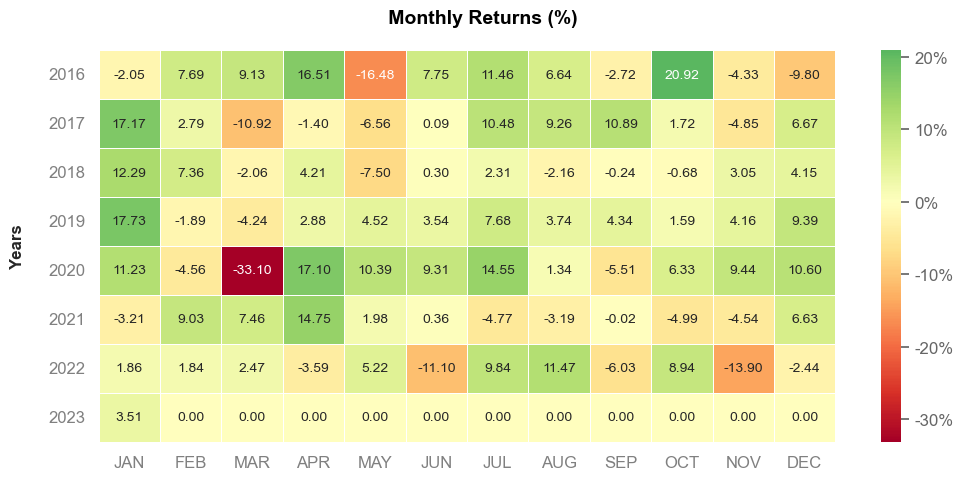

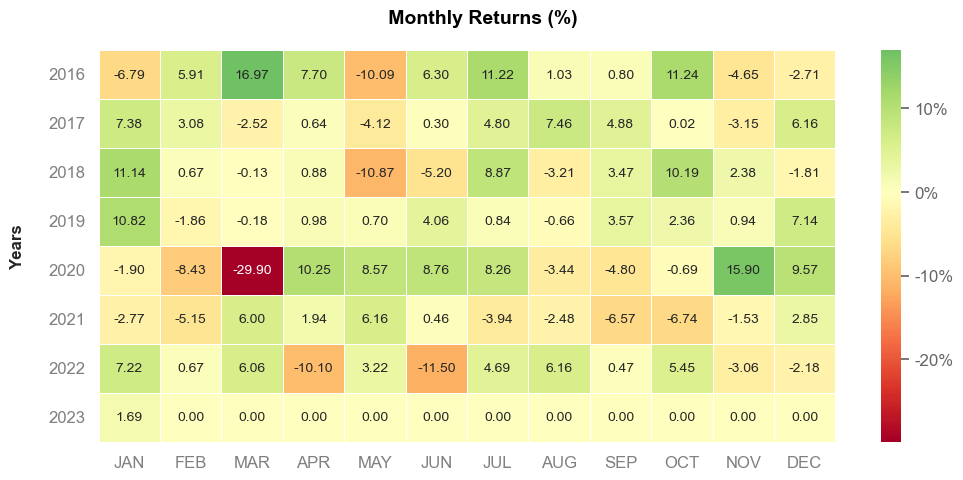

In [20]:
qs.extend_pandas()

retornos_modelo['retorno'].plot_monthly_heatmap()

retornos_modelo['ibovespa'].plot_monthly_heatmap()

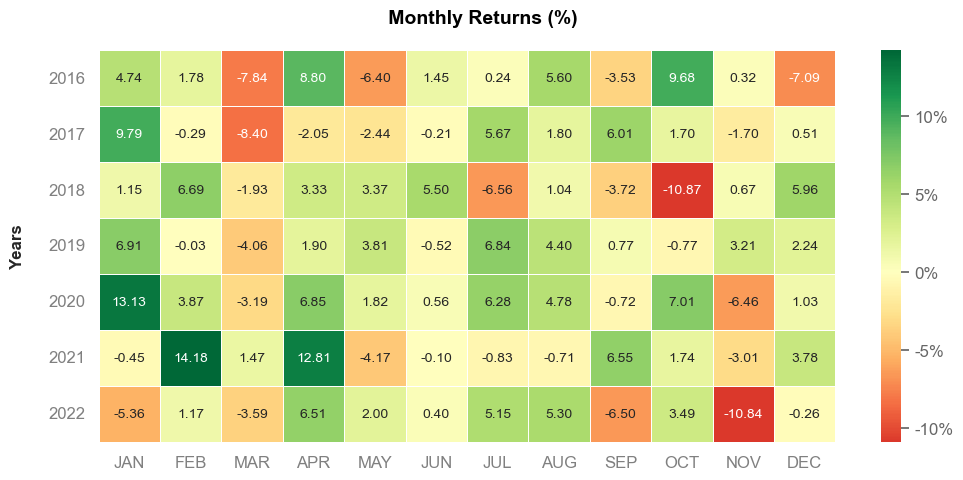

In [205]:
serie_long_short = retornos_modelo['retorno'] - retornos_modelo['ibovespa']

serie_long_short.plot_monthly_heatmap()

In [21]:
#meses batendo o mercado 

retornos_modelo_bateu_mercado = retornos_modelo.copy()

retornos_modelo_bateu_mercado['bateu_mercado'] = retornos_modelo['retorno'] > retornos_modelo['ibovespa']

print(retornos_modelo_bateu_mercado)

proporcao_meses_bateu_o_mercado = sum(retornos_modelo_bateu_mercado['bateu_mercado']/len(retornos_modelo_bateu_mercado['bateu_mercado']))
print(proporcao_meses_bateu_o_mercado)

             retorno  ibovespa  bateu_mercado
2016-01-31 -0.020538 -0.067912           True
2016-02-29  0.076903  0.059100           True
2016-03-29  0.091320  0.169673          False
2016-04-30  0.165053  0.077035           True
2016-05-30 -0.164842 -0.100889          False
...              ...       ...            ...
2022-09-30 -0.060277  0.004693          False
2022-10-30  0.089395  0.054527           True
2022-11-30 -0.138985 -0.030602          False
2022-12-30 -0.024385 -0.021825          False
2023-01-31  0.035117  0.016877           True

[85 rows x 3 columns]
0.6235294117647059


In [22]:
#retorno anual

retorno_anual = retornos_modelo.copy()
retorno_anual['retorno'] = retorno_anual['retorno'] + 1 
retorno_anual['ibovespa'] = retorno_anual['ibovespa'] + 1

retorno_anual["ano"] = retorno_anual.index.year

retorno_anual["retorno_acumulado_ano"] = retorno_anual.groupby('ano')['retorno'].cumprod() - 1
retorno_anual["retorno_acumulado_ibov"] = retorno_anual.groupby('ano')['ibovespa'].cumprod() - 1

retorno_anual = retorno_anual.reset_index()

retorno_anual = (retorno_anual.groupby(['ano']).tail(1))[['ano', 'retorno_acumulado_ano', 'retorno_acumulado_ibov']]

retorno_anual.style.format({
    'retorno_acumulado_ano': '{:,.2%}'.format,
    'retorno_acumulado_ibov': '{:,.2%}'.format})


,ano,retorno_acumulado_ano,retorno_acumulado_ibov
11,2016,45.61%,38.93%
23,2017,36.72%,26.86%
35,2018,21.52%,15.03%
47,2019,66.14%,31.95%
59,2020,41.68%,2.88%
71,2021,18.72%,-12.14%
83,2022,0.92%,4.97%
84,2023,3.51%,1.69%


In [23]:
cumulative_ret_modelo = (retornos_modelo.retorno + 1).cumprod() - 1

cumulative_ret_ibov = (retornos_modelo.ibovespa + 1).cumprod() - 1

df_acumulado = pd.DataFrame(data = {"retorno_acum_modelo": cumulative_ret_modelo, "retorno_acum_ibov" : cumulative_ret_ibov }, index = cumulative_ret_ibov.index)

df_acumulado = df_acumulado.resample("Y").last()

df_acumulado = df_acumulado[['retorno_acum_modelo', 'retorno_acum_ibov']]

df_acumulado.style.format({
    'retorno_acum_modelo': '{:,.2%}'.format,
    'retorno_acum_ibov': '{:,.2%}'.format
})

,retorno_acum_modelo,retorno_acum_ibov
2016-12-31 00:00:00,45.61%,38.93%
2017-12-31 00:00:00,99.08%,76.24%
2018-12-31 00:00:00,141.92%,102.74%
2019-12-31 00:00:00,301.93%,167.51%
2020-12-31 00:00:00,469.44%,175.22%
2021-12-31 00:00:00,576.07%,141.80%
2022-12-31 00:00:00,582.28%,153.82%
2023-12-31 00:00:00,606.24%,158.10%


<AxesSubplot:>

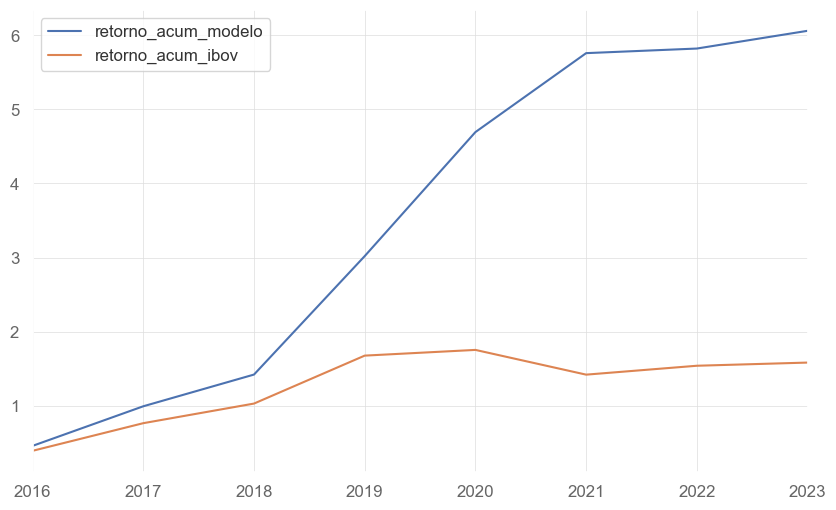

In [24]:
df_acumulado.plot()

In [25]:
selic = sgs.get({'selic': 432}, start = '2016-01-31', end = datetime.now())
inflacao = sgs.get({'ipca': 433, 'igp-m': 189}, start = '2016-01-31', end = '2023-')

In [26]:
selic

,selic
Date,
2016-01-31,14.25
2016-02-01,14.25
2016-02-02,14.25
2016-02-03,14.25
2016-02-04,14.25
...,...
2023-02-13,13.75
2023-02-14,13.75
2023-02-15,13.75


In [27]:
inflacao['ipca']

lista_ipca = []
for ipca in inflacao['ipca']:
    lista_ipca.append(ipca)
    
len(lista_ipca)

85

In [28]:
retornos_modelo = retornos_modelo[0:-1]

In [29]:
retornos_modelo['ipca'] = pd.Series(lista_ipca, index = list(retornos_modelo.index))
retornos_modelo['ipca'] = retornos_modelo['ipca']/100

ValueError: Length of values (85) does not match length of index (84)

In [30]:
retornos_modelo['retorno real'] = ((1 + retornos_modelo['retorno'])/(1 + retornos_modelo['ipca'])) - 1
retornos_modelo

KeyError: 'ipca'

In [31]:
retornos_modelo = retornos_modelo[['retorno','ibovespa','retorno real']]
retornos_modelo
retornos_modelo.style.format({
     'retorno': '{:,.2%}'.format,
     'ibovespa': '{:,.2%}'.format,
     'retorno real': '{:,.2%}'.format
 })

KeyError: "['retorno real'] not in index"

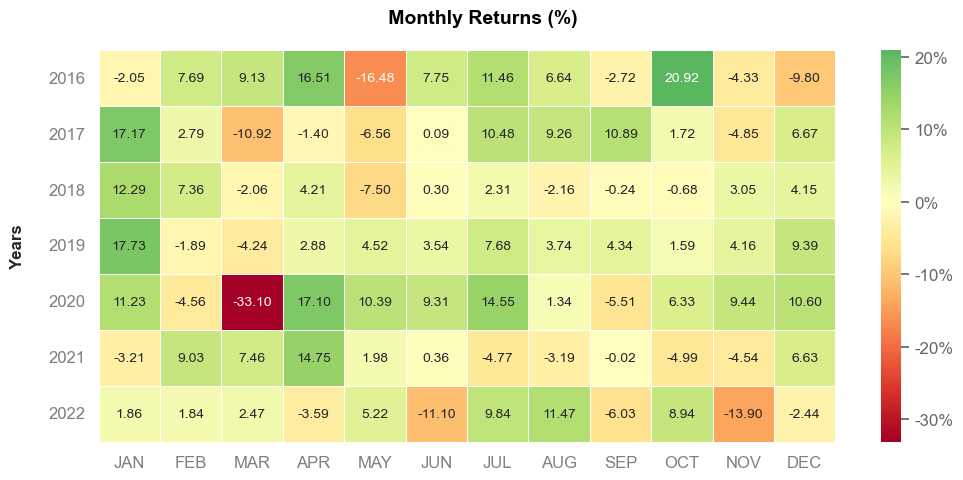

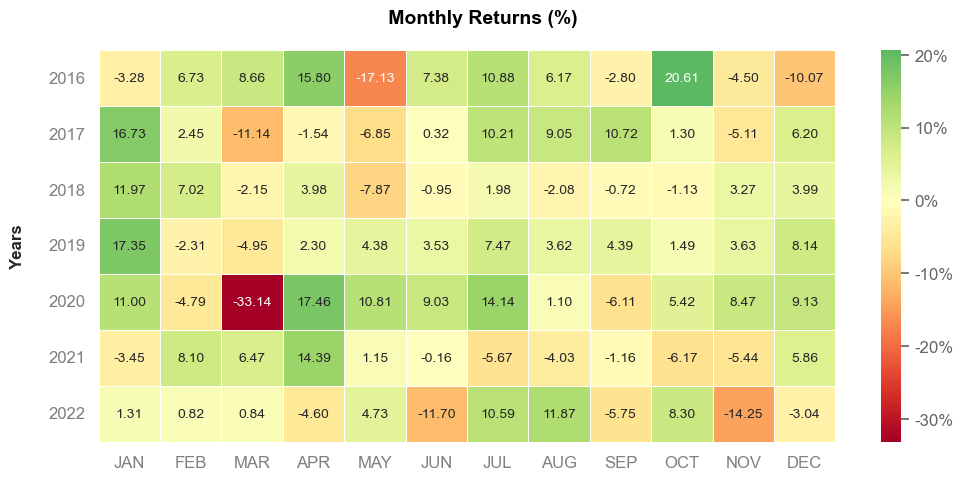

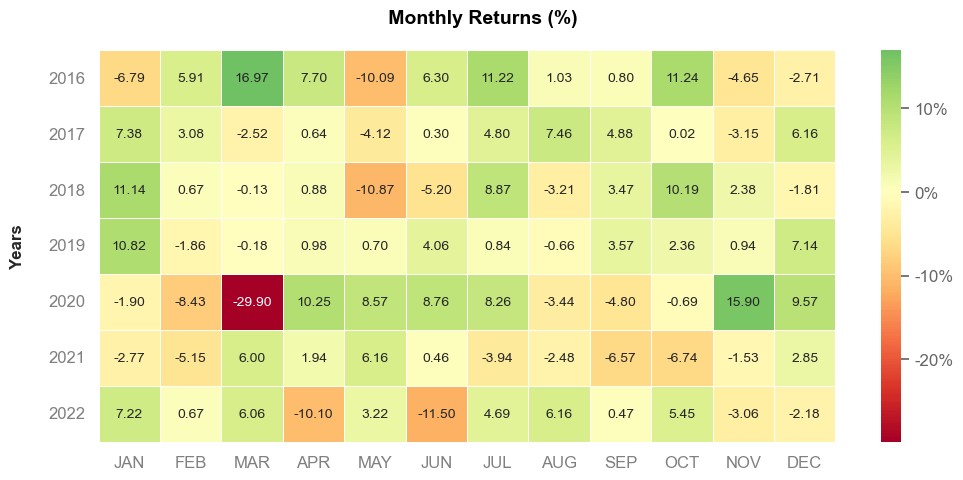

In [208]:
qs.extend_pandas()

retornos_modelo['retorno'].plot_monthly_heatmap()

retornos_modelo['retorno real'].plot_monthly_heatmap()

retornos_modelo['ibovespa'].plot_monthly_heatmap()

In [209]:
#retorno anual

retorno_anual = retornos_modelo.copy()
retorno_anual['retorno real'] = retorno_anual['retorno real'] + 1 
retorno_anual['ibovespa'] = retorno_anual['ibovespa'] + 1

retorno_anual["ano"] = retorno_anual.index.year

retorno_anual["retorno_acumulado_ano"] = retorno_anual.groupby('ano')['retorno real'].cumprod() - 1
retorno_anual["retorno_acumulado_ibov"] = retorno_anual.groupby('ano')['ibovespa'].cumprod() - 1

retorno_anual = retorno_anual.reset_index()

retorno_anual = (retorno_anual.groupby(['ano']).tail(1))[['ano', 'retorno_acumulado_ano', 'retorno_acumulado_ibov']]

retorno_anual.style.format({
    'retorno_acumulado_ano': '{:,.2%}'.format,
    'retorno_acumulado_ibov': '{:,.2%}'.format})


,ano,retorno_acumulado_ano,retorno_acumulado_ibov
11,2016,36.99%,38.93%
23,2017,32.81%,26.86%
35,2018,17.13%,15.03%
47,2019,59.28%,31.95%
59,2020,35.55%,2.88%
71,2021,7.87%,-12.14%
83,2022,-4.60%,4.97%


In [210]:
cumulative_ret_modelo = (retornos_modelo.retorno + 1).cumprod() - 1

cumulative_ret_ibov = (retornos_modelo.ibovespa + 1).cumprod() - 1

df_acumulado = pd.DataFrame(data = {"retorno_acum_modelo": cumulative_ret_modelo, "retorno_acum_ibov" : cumulative_ret_ibov }, index = cumulative_ret_ibov.index)

df_acumulado = df_acumulado.resample("Y").last()

df_acumulado = df_acumulado[['retorno_acum_modelo', 'retorno_acum_ibov']]

df_acumulado.style.format({
    'retorno_acum_modelo': '{:,.2%}'.format,
    'retorno_acum_ibov': '{:,.2%}'.format
})

,retorno_acum_modelo,retorno_acum_ibov
2016-12-31 00:00:00,45.61%,38.93%
2017-12-31 00:00:00,99.08%,76.24%
2018-12-31 00:00:00,141.92%,102.74%
2019-12-31 00:00:00,301.93%,167.51%
2020-12-31 00:00:00,469.44%,175.22%
2021-12-31 00:00:00,576.07%,141.80%
2022-12-31 00:00:00,582.28%,153.82%


<AxesSubplot:>

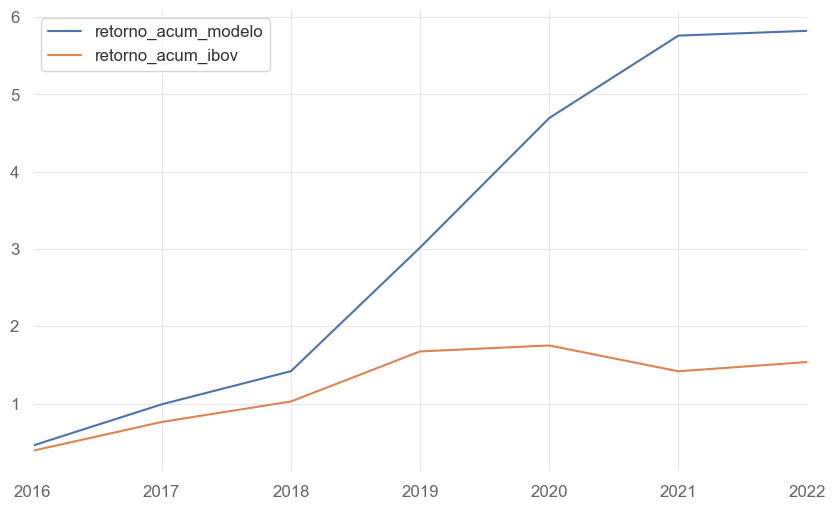

In [211]:
df_acumulado.plot()